In [1]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 2.3.0
Keras version: 2.4.0


In [3]:
import pandas as pd

In [121]:
!pip install matplotlib

In [4]:
import numpy as np

In [146]:
data=pd.read_csv("AirQualityUCI.csv",sep=";",decimal=',')

In [148]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [167]:
data.drop(["Unnamed: 15","Unnamed: 16"],axis=1,inplace=True)

In [168]:
data1=data[data["Date"].notna()] #to drop null rows

In [169]:
data1.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [172]:
data1.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [173]:
data1.dropna(how="all",thresh=10,axis=0,inplace=True)

C:\Users\Kishan\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [175]:
data1.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [176]:
list(data1.select_dtypes("float64"))

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [177]:
#here as given in description that -200 is not avalailble
#lets check those no of columns
columns=list(data1.select_dtypes("float64"))
for colname in columns:
    print(f"{colname} : {data1[colname].value_counts()[-200]}")

CO(GT) : 1683
PT08.S1(CO) : 366
NMHC(GT) : 8443
C6H6(GT) : 366
PT08.S2(NMHC) : 366
NOx(GT) : 1639
PT08.S3(NOx) : 366
NO2(GT) : 1642
PT08.S4(NO2) : 366
PT08.S5(O3) : 366
T : 366
RH : 366
AH : 366


In [178]:
#here above we can see that the -200 means missing values are there so we can just replace it nan so we can do easy 
for colname in data1.columns:
    data1[colname]=data1[colname].replace(-200,np.NAN)

C:\Users\Kishan\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [180]:
#we can simply drop the  NMHC(GT) because it has only 914 non null rows 

data1.drop("NMHC(GT)",axis=1,inplace=True)

C:\Users\Kishan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [181]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


In [205]:
#we can see most important columns has only 8991 non nul rows hence we can see what is there??
df2=data.loc[np.where(df1["PT08.S1(CO)"].notnull()==True)]

# so now  get why other -200 is left because we have done for float data type but others are just string
# so we need to drop these rows


In [206]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8991 non-null   object 
 1   Time           8991 non-null   object 
 2   CO(GT)         8991 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       8991 non-null   float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        8991 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        8991 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [207]:
df2.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,-34.897053,1099.833166,-158.702591,10.083105,939.153376,163.745078,835.493605,56.666555,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,78.202259,217.080037,140.680200,7.449820,266.831429,252.090703,256.817320,126.910900,346.206794,398.484288,8.832116,17.316892,0.403813
min,-200.000000,647.000000,-200.000000,0.100000,383.000000,-200.000000,322.000000,-200.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,0.600000,937.000000,-200.000000,4.400000,734.500000,49.000000,658.000000,52.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.500000,1063.000000,-200.000000,8.200000,909.000000,140.000000,806.000000,96.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.600000,1231.000000,-200.000000,14.000000,1116.000000,280.000000,969.500000,132.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


<AxesSubplot:ylabel='Frequency'>

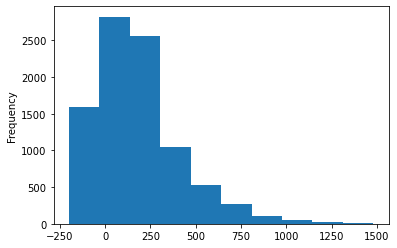

In [208]:
# Now we are going ton handle the only places where NOx(GT),NO2(GT) are null

#lets check those two columns stats


df2['NOx(GT)'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

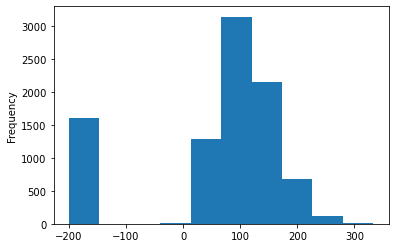

In [209]:

df2['NO2(GT)'].plot(kind="hist")

In [210]:
# we will replace the null with eman value for those columns

df2["NO2(GT)"]=df2["NO2(GT)"].replace(np.NAN,np.mean(df2["NO2(GT)"]))
df2["NOx(GT)"]=df2["NOx(GT)"].replace(np.NAN,np.mean(df2["NOx(GT)"]))

In [211]:
#now check again

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8991 non-null   object 
 1   Time           8991 non-null   object 
 2   CO(GT)         8991 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       8991 non-null   float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        8991 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        8991 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='RH', ylabel='AH'>

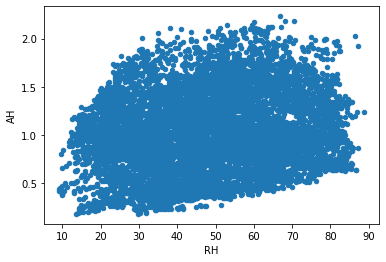

In [212]:
df2.plot(x='RH',y='AH',kind="scatter")

In [213]:
df2.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.117828,0.130118,0.068549,0.077325,0.532309,-0.081036,0.670099,-0.060633,0.122234,-0.130533,-0.020492,-0.187919
PT08.S1(CO),0.117828,1.000000,0.250628,0.883795,0.892964,0.564630,-0.771938,0.313563,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.130118,0.250628,1.000000,0.136698,0.134317,0.000738,0.052192,0.106870,0.213850,0.111533,-0.068140,-0.014311,-0.123688
C6H6(GT),0.068549,0.883795,0.136698,1.000000,0.981950,0.538118,-0.735744,0.265851,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.077325,0.892964,0.134317,0.981950,1.000000,0.534201,-0.796703,0.285569,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.532309,0.564630,0.000738,0.538118,0.534201,1.000000,-0.503144,0.821199,0.143447,0.622205,-0.242007,0.111562,-0.210105
PT08.S3(NOx),-0.081036,-0.771938,0.052192,-0.735744,-0.796703,-0.503144,1.000000,-0.287317,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.670099,0.313563,0.106870,0.265851,0.285569,0.821199,-0.287317,1.000000,0.024735,0.338367,-0.139509,-0.082190,-0.257482
PT08.S4(NO2),-0.060633,0.682881,0.213850,0.765731,0.777254,0.143447,-0.538468,0.024735,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.122234,0.899324,0.111533,0.865689,0.880578,0.622205,-0.796569,0.338367,0.591144,1.000000,-0.027172,0.124956,0.070751


In [215]:
df2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [287]:
df3=df2.drop(["Date","Time"],axis=1)

In [288]:
df3.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [289]:
dataset=tf.data.Dataset.from_tensor_slices((df3.values, target.values))

In [290]:
dataset

<TensorSliceDataset shapes: ((13,), ()), types: (tf.float64, tf.float64)>

In [291]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [2.600e+00 1.360e+03 1.500e+02 1.190e+01 1.046e+03 1.660e+02 1.056e+03
 1.130e+02 1.692e+03 1.268e+03 1.360e+01 4.890e+01 7.578e-01], Target: 48.9
Features: [2.000e+00 1.292e+03 1.120e+02 9.400e+00 9.550e+02 1.030e+02 1.174e+03
 9.200e+01 1.559e+03 9.720e+02 1.330e+01 4.770e+01 7.255e-01], Target: 47.7
Features: [2.200e+00 1.402e+03 8.800e+01 9.000e+00 9.390e+02 1.310e+02 1.140e+03
 1.140e+02 1.555e+03 1.074e+03 1.190e+01 5.400e+01 7.502e-01], Target: 54.0
Features: [2.200e+00 1.376e+03 8.000e+01 9.200e+00 9.480e+02 1.720e+02 1.092e+03
 1.220e+02 1.584e+03 1.203e+03 1.100e+01 6.000e+01 7.867e-01], Target: 60.0
Features: [1.600e+00 1.272e+03 5.100e+01 6.500e+00 8.360e+02 1.310e+02 1.205e+03
 1.160e+02 1.490e+03 1.110e+03 1.120e+01 5.960e+01 7.888e-01], Target: 59.6


In [294]:
train_dataset = dataset.shuffle(len(df3)).batch(1)

In [295]:
train_dataset

<BatchDataset shapes: ((None, 13), (None,)), types: (tf.float64, tf.float64)>

In [308]:
epochs=20
batch_size =100

In [309]:
model=tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(100,activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(100,activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1)
])

In [310]:
optimiser = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer= optimiser, loss='mse', metrics = ['accuracy'])

In [311]:
model.fit(train_dataset,epochs=epochs,batch_size=batch_size)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

8991/8991 [==============================] - 10s 1ms/step - loss: 16.1489 - accuracy: 0.0000e+00
Epoch 2/20
8991/8991 [==============================] - 10s 1ms/step - loss: 9.0671 - accuracy: 0.0000e+00
Epoch 3/20
8991/8991 [==============================] - 10s 1ms/step - loss: 7.0355 - accuracy: 0.0000e+00
Epoch 4/20
8991/8991 [==============================] - 10s 1ms/step - loss: 5.8725 - accuracy: 0.0000e+00
Epoch 5/20
8991/8991 [==============================] - 10s 1ms/step - loss: 5.